In [1]:
from pathlib import Path
import pandas as pd

In [2]:
#pth = Path(r'C:\Users\b.vd.broek\surfdrive\Shared\Projects\Daniela Thommen\Floris&Christina\data_2024_run2\output','Measurements.tsv')
pth = Path(r'D:\Temp\Output\ImageStream\TEST','Measurements.tsv')
df = pd.read_csv(pth, sep='\t', encoding="ISO-8859-1")
df.head()

,cell ID,image ID,Area [µm^2],Mean ch1 (BF),Mean ch2 (CD8-FITC),Mean ch3 (CD4-PE),Mean ch4 (CD11c-BV421),Mean ch5 (NGFR-CD146-APC),Mean ch6 (NearIR),Phenotypic immune Cell intensity,Immune/tumor marker ratio,Interaction with (IDs),immune cell markers for clustering,ch2 (CD8-FITC),ch3 (CD4-PE),ch4 (CD11c-BV421),Class,Immune subtype
0,1,1,211.50,-33.868,7.417,1.726,0.377,1217.813,10.469,7.794,0.006,2,15.589,0,0,0,Tumor,0
1,2,1,92.00,-19.258,419.894,1.177,37.209,42.095,1.514,457.103,10.859,1,914.207,1,0,0,Immune,CD8+
2,3,2,91.25,-27.984,329.907,1.222,4.474,5.126,0.115,334.381,65.232,4,668.762,1,0,0,Immune,CD8+
3,4,2,192.75,-4.882,7.275,2.661,4.507,60.141,0.944,11.782,0.196,3,23.564,0,0,0,Tumor,0
4,5,3,211.00,-68.389,9.783,5.470,4.373,562.442,4.916,14.156,0.025,0,28.313,0,0,0,Tumor,0


In [3]:
def getcelltype(row_in):
    if row_in['Class'] == 'Immune':
        if row_in['Immune subtype'] in ['Unknown', 'All negative']:
            return 'Other'
        return row_in['Immune subtype']
    elif row_in['Class'] == 'Tumor':
        return 'Tumor'
    else:  # crap of iets dergelijks
        return ''

In [4]:
data = []
for index, row in df.iterrows():
    celltype = getcelltype(row)
    if celltype:
        inter = [int(x)-1 for x in row['Interaction with (IDs)'].split(',')]
        if inter[0]==-1:
            continue
        for cellid in inter:
            if getcelltype(df.iloc[cellid]):
                data.append({'1':celltype, '2':getcelltype(df.iloc[cellid])})


In [5]:
test = pd.DataFrame(data)

In [6]:
test.groupby("1").value_counts().unstack(fill_value=0, sort=True)

2,CD11c+,CD4+,CD4+ | CD11c+,CD8+,CD8+ | CD11c+,CD8+ | CD4+,CD8+ | CD4+ | CD11c+,Tumor
1,,,,,,,,
CD11c+,0,0,3,1,0,0,0,6
CD4+,0,2,3,0,0,2,0,0
CD4+ | CD11c+,3,3,2,6,5,0,9,21
CD8+,1,0,6,94,5,9,14,537
CD8+ | CD11c+,0,0,5,5,4,0,10,70
CD8+ | CD4+,0,2,0,9,0,12,7,16
CD8+ | CD4+ | CD11c+,0,0,9,14,10,7,62,26
Tumor,6,0,21,537,70,16,26,1574


In [7]:
ct = pd.crosstab(test["1"], test["2"])
print(ct)

2                     CD11c+  CD4+  CD4+ | CD11c+  CD8+  CD8+ | CD11c+  \
1                                                                        
CD11c+                     0     0              3     1              0   
CD4+                       0     2              3     0              0   
CD4+ | CD11c+              3     3              2     6              5   
CD8+                       1     0              6    94              5   
CD8+ | CD11c+              0     0              5     5              4   
CD8+ | CD4+                0     2              0     9              0   
CD8+ | CD4+ | CD11c+       0     0              9    14             10   
Tumor                      6     0             21   537             70   

2                     CD8+ | CD4+  CD8+ | CD4+ | CD11c+  Tumor  
1                                                               
CD11c+                          0                     0      6  
CD4+                            2                     0      0  

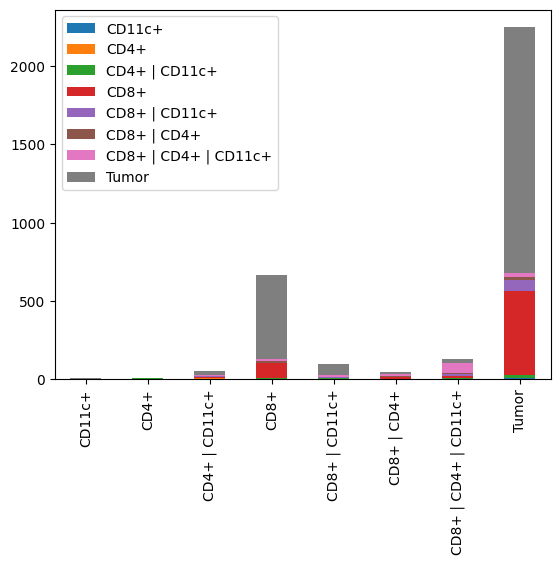

In [8]:
plt = ct.plot(kind='bar', stacked=True)
plt.xaxis.label.set_visible(False)
plt.legend()